## Step 0: Imports & Reading Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

 ## Step 01: Data Understanding  
 - Dataframe shape
 - head & tail
 - dtypes
 - describe

In [2]:
bank_df = pd.read_excel('WorldBank.xlsx')

In [3]:
bank_df.sample(5)

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
11311,Tunisia,TUN,Middle East & North Africa,Upper middle income,1976,37.263,11.081,239.178,4.507930e+09,779.045,NaN,88.1,57.8660,37.2456,NaN
448,Argentina,ARG,Latin America & Caribbean,High income: nonOECD,1983,23.451,8.402,1259.170,1.040000e+11,3553.380,NaN,29.9,70.2620,10.6925,NaN
12347,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2002,44.935,16.743,644.112,4.193850e+09,382.242,0.477751,84.0,45.4000,14.7590,14.491
8856,Poland,POL,Europe & Central Asia,High income: OECD,2012,10.100,10.100,3899.180,5.000000e+11,13145.500,62.310000,4.7,76.7463,124.3000,10.088
8171,North Korea,PRK,East Asia & Pacific,Low income,1989,20.668,5.716,1323.960,NaN,NaN,NaN,30.7,69.6110,166.0470,NaN


### Exploratory Data Analysis (EDA)

#### Structural Analysis
- **Target Variable**: Income Group  
- **Rows and Columns**: 12,390 rows, 15 columns  
- **Variable Types**: Quantitative: 11, Qualitative: 4  
- **Missing Value Analysis**:  
  - Part 01: Columns with **100%** of values  
  - Part 02: Columns with missing values **(5% to 10%)**  
  - Part 03: Columns with missing values **(greater than 20%)**  
  - Part 04: Columns with missing values **(greater than 50%)**  

#### Content Analysis
- **Target Visualization**:  
  - Upper middle income: **25.23%**  
  - Lower middle income: **22.85%**  
  - High income (non-OECD): **22.38%**  
  - Low income: **14.76%**  
  - High income (OECD): **14.76%**

In [4]:
bank_df.shape

(12449, 15)

In [5]:
bank_df.isna().sum()

Country Name                                                       0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
Year                                                               0
Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor for

#### Display the percentage missing values for each column

In [6]:
(bank_df.isna().sum()/bank_df.shape[0]).sort_values(ascending=False)

Individuals using the Internet (% of population)                0.593220
Unemployment (% of total labor force) (modeled ILO estimate)    0.581653
Electric power consumption (kWh per capita)                     0.530243
GDP per capita (USD)                                            0.230862
GDP (USD)                                                       0.230621
Infant mortality rate (per 1,000 live births)                   0.198008
Life expectancy at birth (years)                                0.102257
Death rate, crude (per 1,000 people)                            0.082979
Birth rate, crude (per 1,000 people)                            0.081051
Population density (people per sq. km of land area)             0.048518
Country Name                                                    0.000000
Country Code                                                    0.000000
Region                                                          0.000000
IncomeGroup                                        

#### plotting to display the null values


<Figure size 600x600 with 0 Axes>

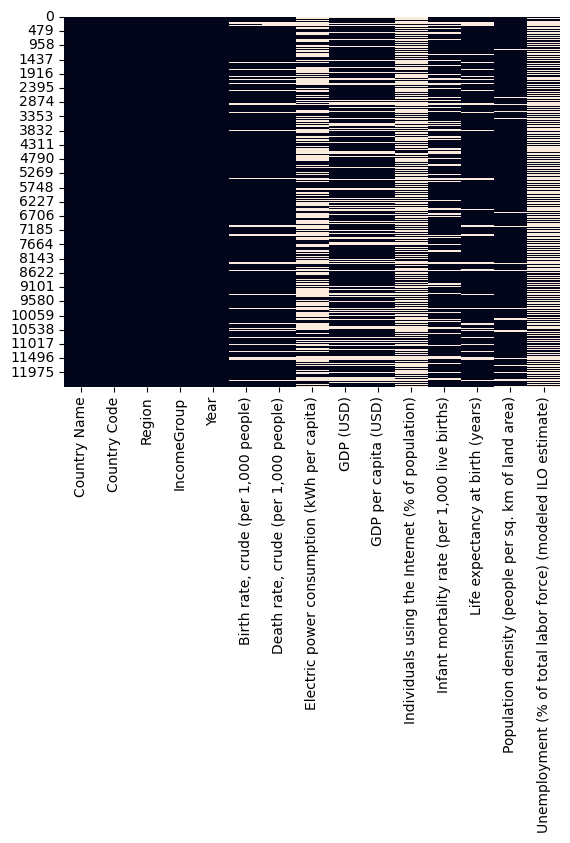

<Figure size 600x600 with 0 Axes>

In [7]:
sns.heatmap(bank_df.isna(), cbar=False)
plt.figure(figsize=(6,6))

In [8]:
bank_df.dtypes

Country Name                                                     object
Country Code                                                     object
Region                                                           object
IncomeGroup                                                      object
Year                                                              int64
Birth rate, crude (per 1,000 people)                            float64
Death rate, crude (per 1,000 people)                            float64
Electric power consumption (kWh per capita)                     float64
GDP (USD)                                                       float64
GDP per capita (USD)                                            float64
Individuals using the Internet (% of population)                float64
Infant mortality rate (per 1,000 live births)                   float64
Life expectancy at birth (years)                                float64
Population density (people per sq. km of land area)             

In [9]:
bank_df.dtypes.value_counts()

float64    10
object      4
int64       1
Name: count, dtype: int64

In [10]:
# Report for in-depth data analysis 
profile = ProfileReport(bank_df, title= 'Summey Report for my dataset')

In [11]:
# select just the columns contains object variables 
for col in bank_df.select_dtypes('object'):
    print(col)

Country Name
Country Code
Region
IncomeGroup


In [12]:
# Data info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [13]:
bank_df.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000


 ## Step 02: Data Preperation
 - Dropping irrelevant columns & rows
 - Identifying duplicated columns
 - Renaming columns 
 - Feature creation

In [14]:
bank_df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Electric power consumption (kWh per capita)', 'GDP (USD)',
       'GDP per capita (USD)',
       'Individuals using the Internet (% of population)',
       'Infant mortality rate (per 1,000 live births)',
       'Life expectancy at birth (years)',
       'Population density (people per sq. km of land area)',
       'Unemployment (% of total labor force) (modeled ILO estimate)'],
      dtype='object')

##### forentelly we don't have a duplicates rows in our dataset

In [15]:
bank_df.duplicated().sum()

0

In [16]:
World_eco_col = {'Country Name': 'Country',
                 'Country Code': 'Code',
                 'IncomeGroup': 'Income Group',
                 'Birth rate, crude (per 1,000 people)': 'Birth rate (Per 1000)',
                 'Death rate, crude (per 1,000 people)': 'Death rate (per 1000)',
                 'Electric power consumption (kWh per capita)': 'Electric power consumption (kWh)',
                 'GDP (USD)': 'GDP ($)',
                 'Individuals using the Internet (% of population)': 'Internet users (%)',
                 'Infant mortality rate (per 1,000 live births)': 'Infant mortality rate (Per 1000)',
                 'Life expectancy at birth (years)': 'Life expectancy (years)',
                 'Population density (people per sq. km of land area)': 'Population density (per sq. km)',
                 'Unemployment (% of total labor force) (modeled ILO estimate)': 'Unemployment (%)'}

bank_df= bank_df.rename(columns= World_eco_col)
bank_df

,Country,Code,Region,Income Group,Year,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1964,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1963,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1962,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1961,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


#### numerical columns

In [17]:
numerical_columns = bank_df.select_dtypes(include= ['int64', 'float64']).columns
correlation_matrix= bank_df[numerical_columns].corr()

#### Correlation Heatmap of Numerical Variables (for loocking if there a stong relation between numerical variables)

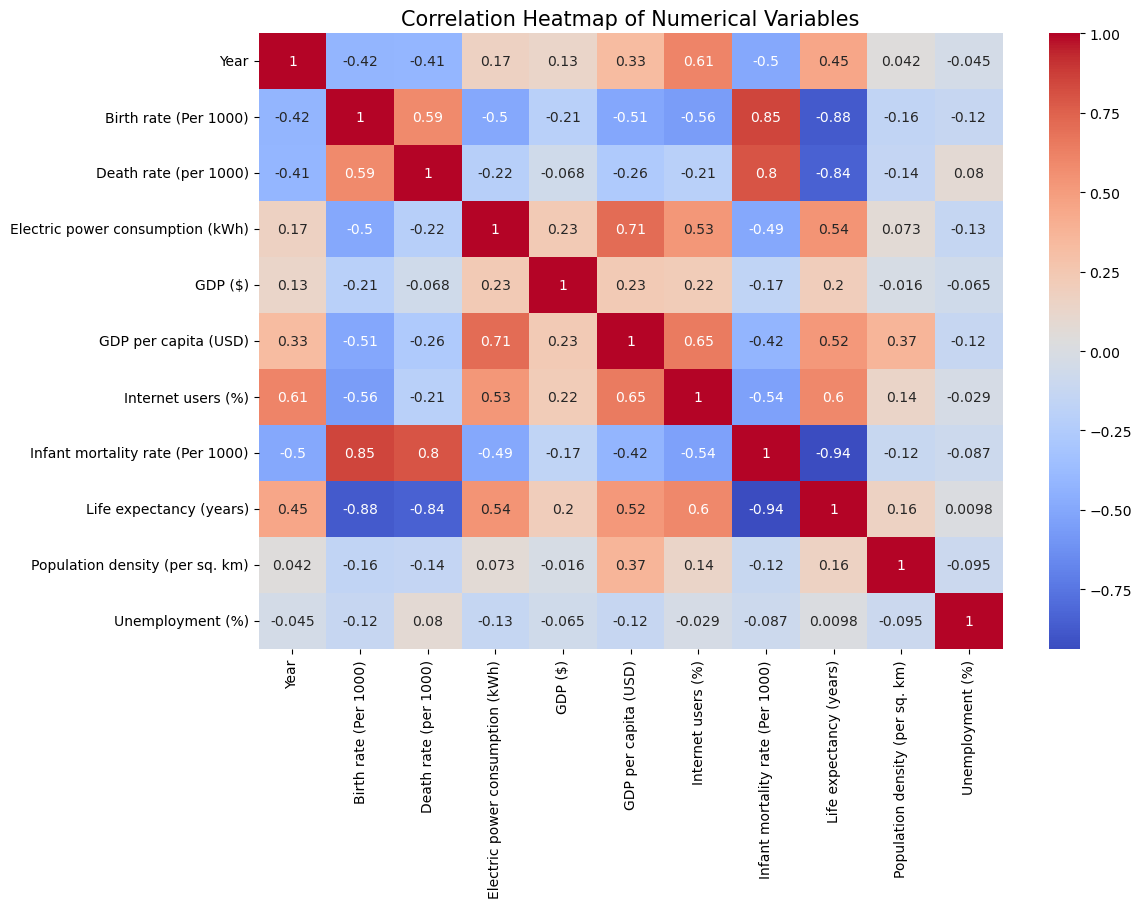

In [18]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=15)

plt.show()


### variable target analysis 

In [19]:
bank_df['Income Group'].value_counts(normalize= True).sort_values(ascending=False)*100

Income Group
Upper middle income     25.118483
Lower middle income     22.748815
High income: nonOECD    22.274882
High income: OECD       15.165877
Low income              14.691943
Name: proportion, dtype: float64

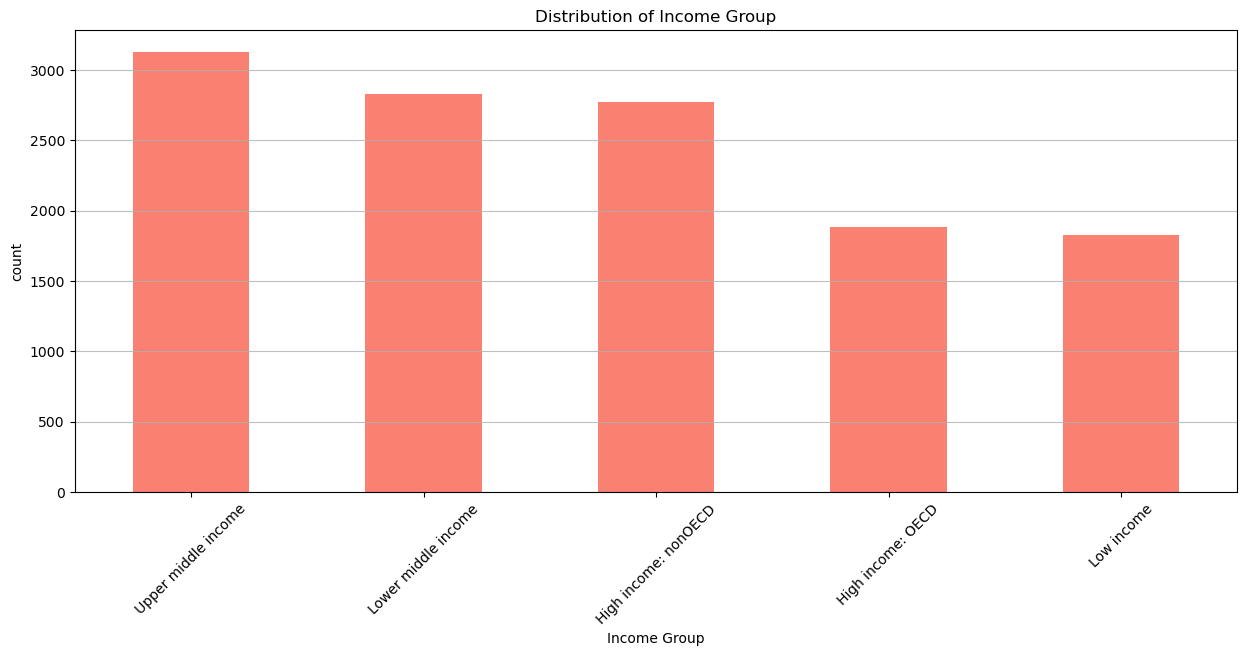

In [20]:
plt.figure(figsize=(15, 6))

bank_df['Income Group'].value_counts().plot(kind='bar', title='Distribution of Income Group', color='salmon')
plt.xlabel('Income Group')
plt.ylabel('count')
plt.grid(axis='y', alpha= 0.8)
plt.xticks(rotation=45)
plt.show()

In [21]:
# classify GDP and handle NaN values
bank_df['GDP_classification'] = np.where(bank_df['GDP ($)'].isna(), 
                                'Unknown',  
                                          np.where(bank_df['GDP ($)'] > 2e+12, 
                                          'High GDP', 
                                                   np.where((bank_df['GDP ($)'] >= 1e+12) & (bank_df['GDP ($)'] <= 2e+12), 
                                                   'Medium GDP', 
                                                   'Low GDP')))

### GDP analysis

 ## Step 03:  Feature Understanding
> Plotting Feature Distributions
 - Barplot
 - Lineplot
 - Heatmap

In [22]:
bank_df['GDP_classification'].unique()

array(['Low GDP', 'Unknown', 'Medium GDP', 'High GDP'], dtype=object)

In [23]:
class_gdp_count = bank_df['GDP_classification'].value_counts(normalize= True)*100
class_gdp_count

GDP_classification
Low GDP       74.238895
Unknown       23.062093
High GDP       1.357539
Medium GDP     1.341473
Name: proportion, dtype: float64

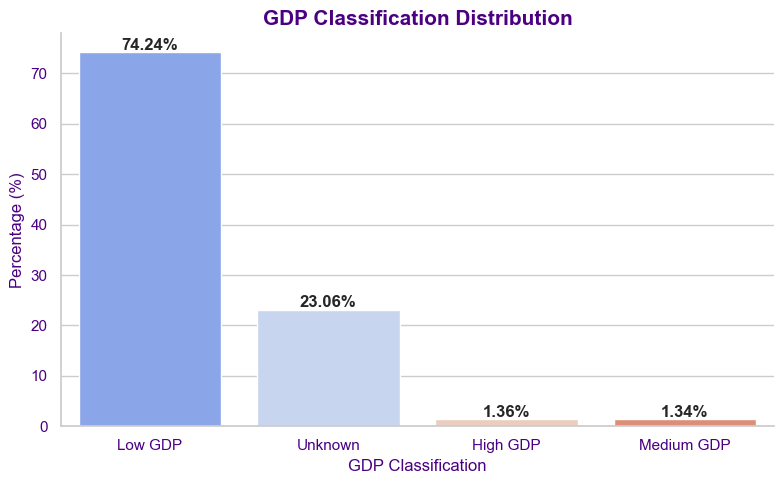

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_gdp_count.index, y=class_gdp_count.values, 
                 palette='coolwarm')

plt.title('GDP Classification Distribution', fontsize=15, fontweight='bold', color='Indigo')
plt.xlabel('GDP Classification', color='Indigo')
plt.ylabel('Percentage (%)', color='Indigo')

# percentages over the bars
for i, v in enumerate(class_gdp_count.values):  
    ax.text(i, v + 0.5, f'{v:.2f}%',
            ha='center', fontweight='bold')

plt.xticks(color='Indigo')
plt.yticks(color='Indigo')

sns.despine()
plt.tight_layout()
plt.show()

In [25]:
max_gdp = bank_df.groupby('Region')['GDP ($)'].max().sort_values(ascending=False)[:3]
max_gdp

Region
North America            2.050000e+13
East Asia & Pacific      1.360000e+13
Europe & Central Asia    4.000000e+12
Name: GDP ($), dtype: float64

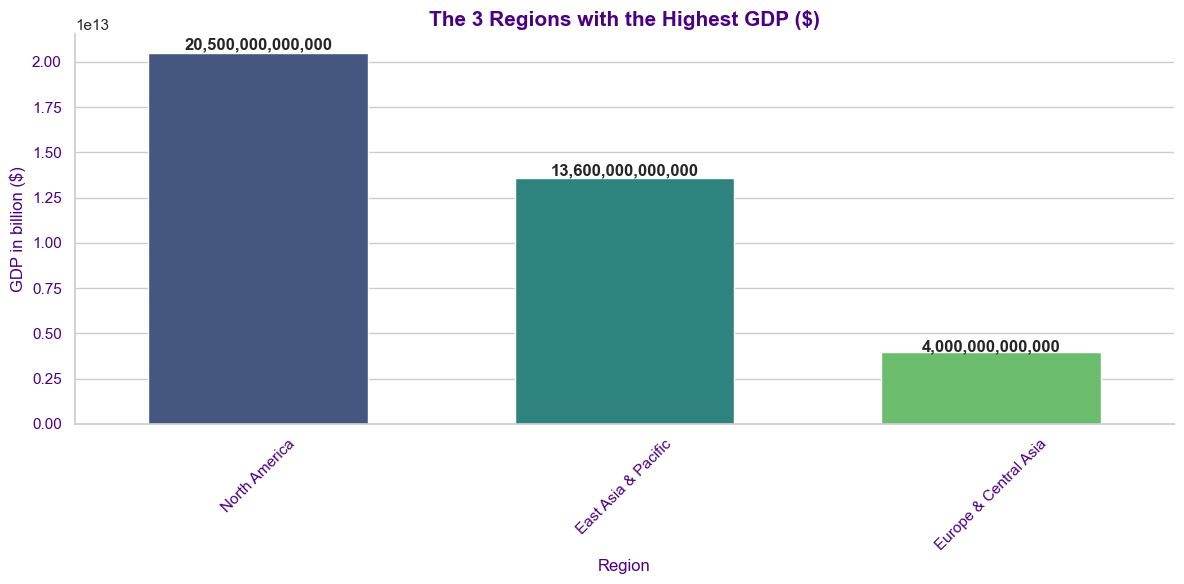

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=max_gdp.index, y=max_gdp.values, 
                 palette='viridis', width=0.6)

plt.title('The 3 Regions with the Highest GDP ($)', fontsize=15, fontweight='bold', color='Indigo')
plt.xlabel('Region', color='Indigo')
plt.ylabel('GDP in billion ($)', color='Indigo')

for i, v in enumerate(max_gdp.values):
    ax.text(i, v + (v * 0.01), f'{v:,.0f}',
            ha='center', fontweight='bold')

plt.xticks(rotation=45, color='Indigo')
plt.yticks(color='Indigo')

sns.despine()
plt.tight_layout()
plt.show()

In [27]:
min_gdp = bank_df.groupby('Region')['GDP ($)'].min().sort_values(ascending=True)[:3]
min_gdp

Region
East Asia & Pacific           8824450.0
Sub-Saharan Africa            9122750.0
Latin America & Caribbean    12366600.0
Name: GDP ($), dtype: float64

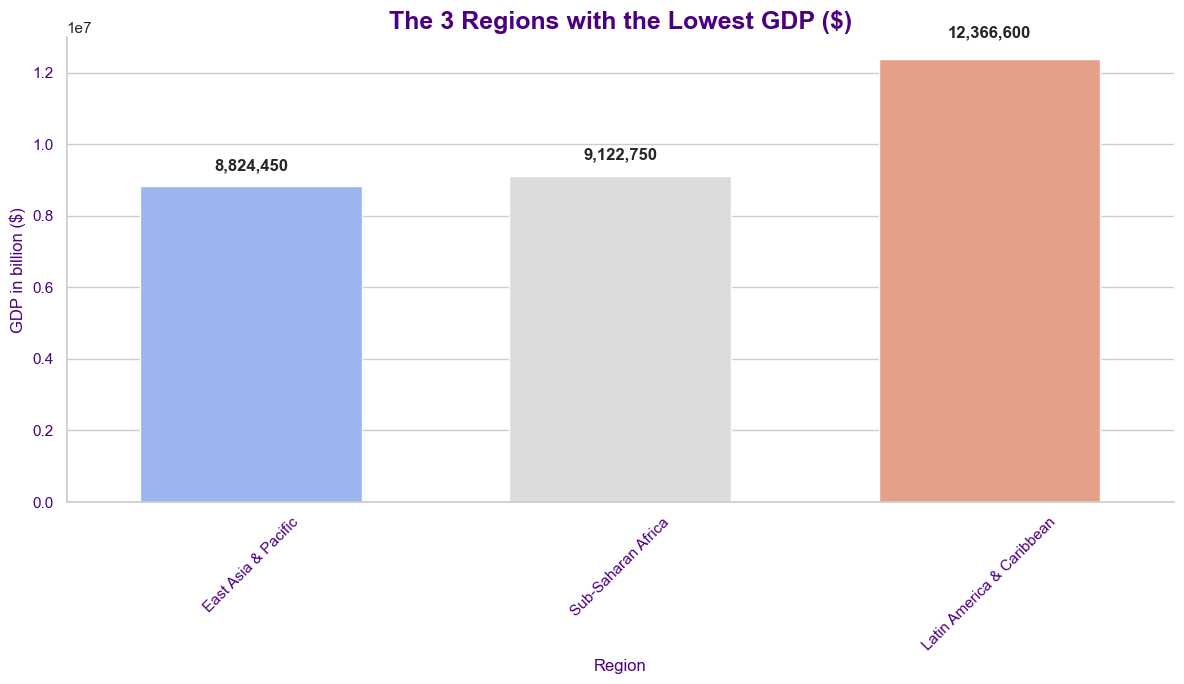

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=min_gdp.index, y=min_gdp.values, 
                 palette='coolwarm', width=0.6)

plt.title('The 3 Regions with the Lowest GDP ($)', fontsize=18, fontweight='bold', color='Indigo')
plt.xlabel('Region',color='Indigo')
plt.ylabel('GDP in billion ($)',color='Indigo')

# Show values on top of each bar
for i, v in enumerate(min_gdp.values):
    ax.text(i, v + (v * 0.05), f'{v:,.0f}', 
            ha='center',
            fontweight='bold')

plt.xticks(rotation=45,color='Indigo')
plt.yticks(color='Indigo')

sns.despine()
plt.tight_layout()
plt.show()

#### Filtering Moroccon data for analysis

In [29]:
# Filtering just the columns contain Moroccan country before analyze it
MAR_filter= bank_df[bank_df['Country']== 'Morocco']
MAR_filter.head(2)

,Country,Code,Region,Income Group,Year,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%),GDP_classification
7493,Morocco,MAR,Middle East & North Africa,Lower middle income,2018,NaN,NaN,NaN,1.180000e+11,3237.88,64.8039,19.2,NaN,80.7285,9.040,Low GDP
7494,Morocco,MAR,Middle East & North Africa,Lower middle income,2017,19.399,5.072,NaN,1.100000e+11,3036.17,61.7622,20.1,76.218,79.7251,9.053,Low GDP


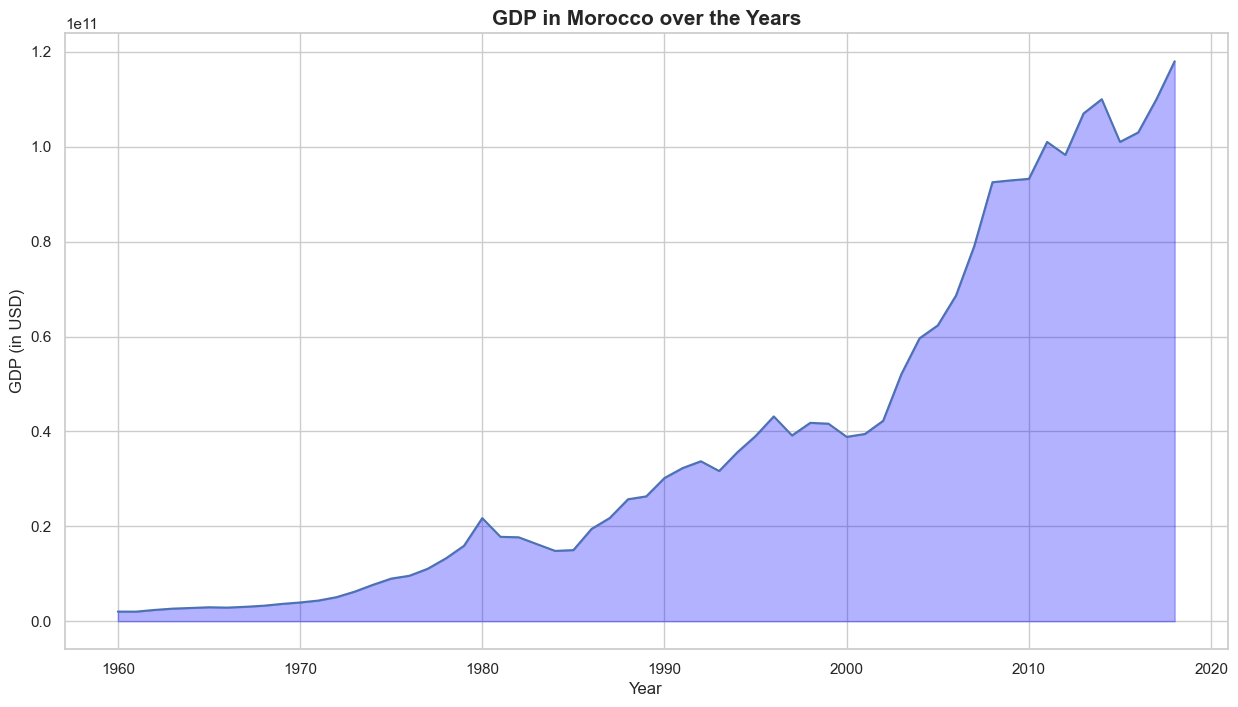

In [30]:
# Plot GDP ($) over the years for Morocco
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='GDP ($)', data=MAR_filter)
plt.fill_between(MAR_filter['Year'], MAR_filter['GDP ($)'], color='blue', 
                 alpha=0.3)

plt.title('GDP in Morocco over the Years', fontsize= 15, fontweight=('bold'))
plt.xlabel('Year')
plt.ylabel('GDP (in USD)')
plt.grid(True)
plt.show()

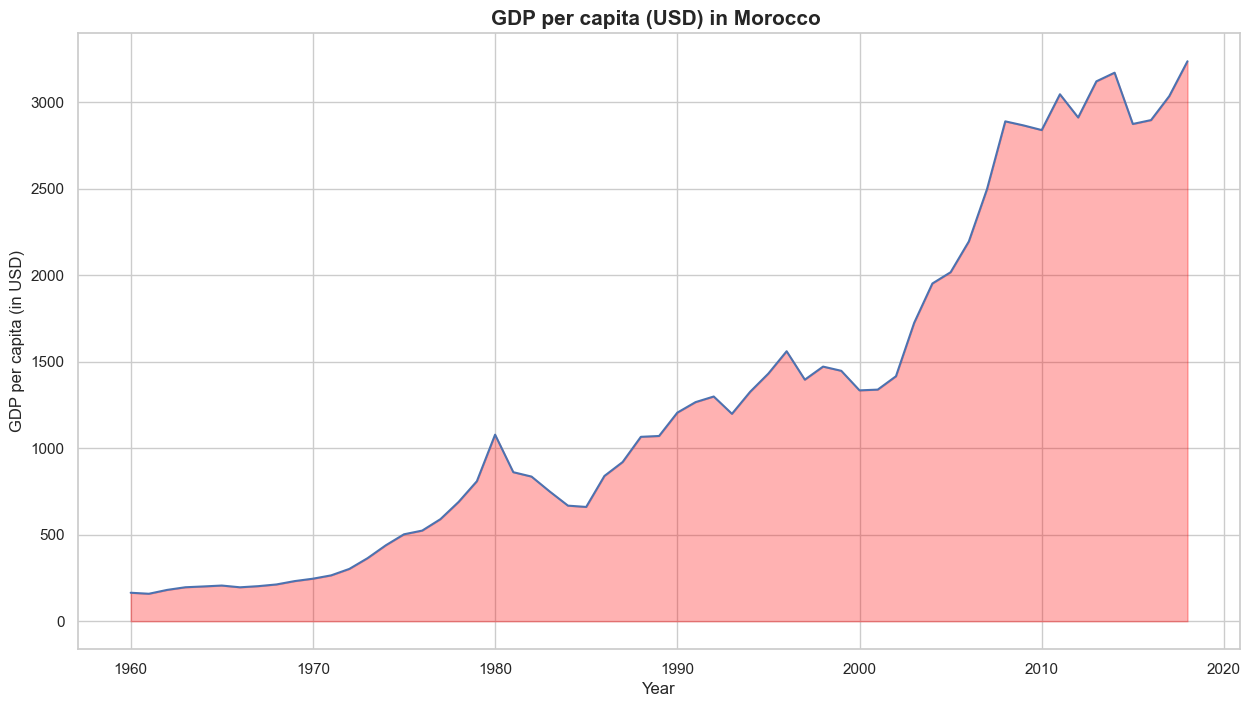

In [31]:
# Plot GDP per capiat ($) over the years for Morocco

plt.figure(figsize=(15,8))
sns.lineplot(x='Year', y='GDP per capita (USD)', data= MAR_filter)
plt.fill_between(MAR_filter['Year'], MAR_filter['GDP per capita (USD)'], color='red', 
                 alpha=0.3)

plt.title('GDP per capita (USD) in Morocco ', fontsize= 15, fontweight=('bold'))
plt.xlabel('Year')
plt.ylabel('GDP per capita (in USD)')
plt.grid(True)
plt.show()

In [32]:
# compare between GDP, GDP per capita over years
MAR_filter.loc[MAR_filter['Year'].isin([1960, 2018]), ['Year', 'GDP ($)', 'GDP per capita (USD)']]

,Year,GDP ($),GDP per capita (USD)
7493,2018,1.180000e+11,3237.880
7551,1960,2.037150e+09,164.801


#### Birth and Death rate analysis 

In [33]:
bank_df.groupby(['Region', 'Income Group'])['Birth rate (Per 1000)'].max().sort_values(ascending= False)

Region                      Income Group        
Sub-Saharan Africa          Low income              58.227
Middle East & North Africa  Lower middle income     56.233
South Asia                  Upper middle income     54.940
Sub-Saharan Africa          Lower middle income     54.472
Middle East & North Africa  Upper middle income     53.407
Latin America & Caribbean   Upper middle income     51.887
                            Lower middle income     51.819
South Asia                  Low income              51.652
Sub-Saharan Africa          Upper middle income     51.094
East Asia & Pacific         Low income              50.185
Middle East & North Africa  High income: nonOECD    50.003
South Asia                  Lower middle income     49.546
East Asia & Pacific         Lower middle income     48.771
Europe & Central Asia       Lower middle income     48.647
East Asia & Pacific         Upper middle income     47.503
Europe & Central Asia       Upper middle income     45.931
East As

In [34]:
bank_df.groupby(['Region', 'Income Group'])['Birth rate (Per 1000)'].sum().sort_values(ascending= False)

Region                      Income Group        
Sub-Saharan Africa          Low income              67913.26900
                            Lower middle income     33678.56600
Latin America & Caribbean   Upper middle income     27165.47750
East Asia & Pacific         Lower middle income     19819.41700
Europe & Central Asia       High income: OECD       18812.30000
Latin America & Caribbean   High income: nonOECD    14382.63996
Middle East & North Africa  Upper middle income     13453.11800
Europe & Central Asia       Upper middle income     13431.10800
Sub-Saharan Africa          Upper middle income     12203.90200
Latin America & Caribbean   Lower middle income     12133.97400
Middle East & North Africa  Lower middle income     11972.13100
                            High income: nonOECD    11504.62000
East Asia & Pacific         Upper middle income     10432.11030
Europe & Central Asia       Lower middle income      9630.26860
South Asia                  Lower middle income      95

In [35]:
bank_df.groupby('Region')['GDP ($)'].max()

Region
East Asia & Pacific           1.360000e+13
Europe & Central Asia         4.000000e+12
Latin America & Caribbean     2.620000e+12
Middle East & North Africa    7.820000e+11
North America                 2.050000e+13
South Asia                    2.730000e+12
Sub-Saharan Africa            5.680000e+11
Name: GDP ($), dtype: float64

In [36]:
# comparing the birth & death by regions 
world_birth_death = bank_df.groupby('Region')[['Birth rate (Per 1000)',
                                            'Death rate (per 1000)']].sum().sort_values(by= 'Death rate (per 1000)',
                                                                                           ascending=False)
world_birth_death

,Birth rate (Per 1000),Death rate (per 1000)
Region,,
Sub-Saharan Africa,117212.93800,43588.44700
Europe & Central Asia,49933.41360,29673.26498
Latin America & Caribbean,57046.81846,16521.92384
East Asia & Pacific,46416.72919,14388.93661
Middle East & North Africa,38283.06900,9571.68000
South Asia,16515.41400,5908.55400
North America,2270.70000,1225.95500


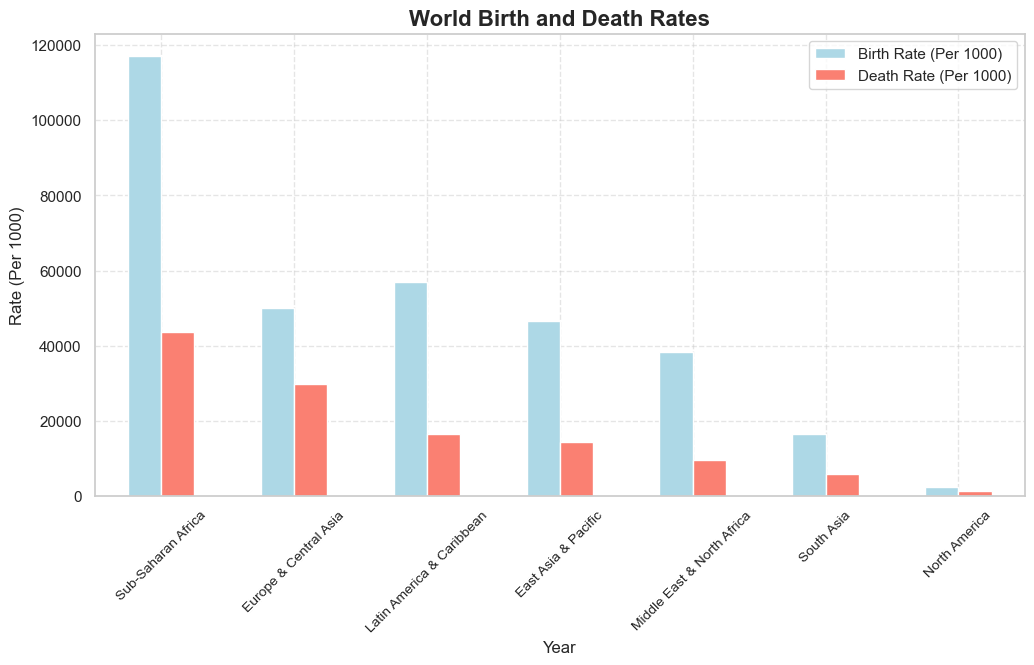

In [37]:
ax = world_birth_death.plot.bar(
    figsize=(12, 6),  color=['lightblue', 'salmon'])

ax.set_title('World Birth and Death Rates', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate (Per 1000)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
ax.grid(True, alpha=0.5, linestyle='--')

ax.legend(['Birth Rate (Per 1000)', 'Death Rate (Per 1000)'], loc='upper right')

plt.show()

In [38]:
# filtering the Birth rate and Death in Morocco over (1960 - 2018)
birth_filter= MAR_filter[MAR_filter['Year'] != 2018].groupby('Year')[['Birth rate (Per 1000)', 
                                                                      'Death rate (per 1000)']].sum()
birth_filter

,Birth rate (Per 1000),Death rate (per 1000)
Year,,
1960,50.979,18.464
1961,50.537,18.083
1962,49.970,17.678
1963,49.282,17.258
1964,48.487,16.830
1965,47.602,16.403
1966,46.649,15.984
1967,45.659,15.575
1968,44.668,15.181


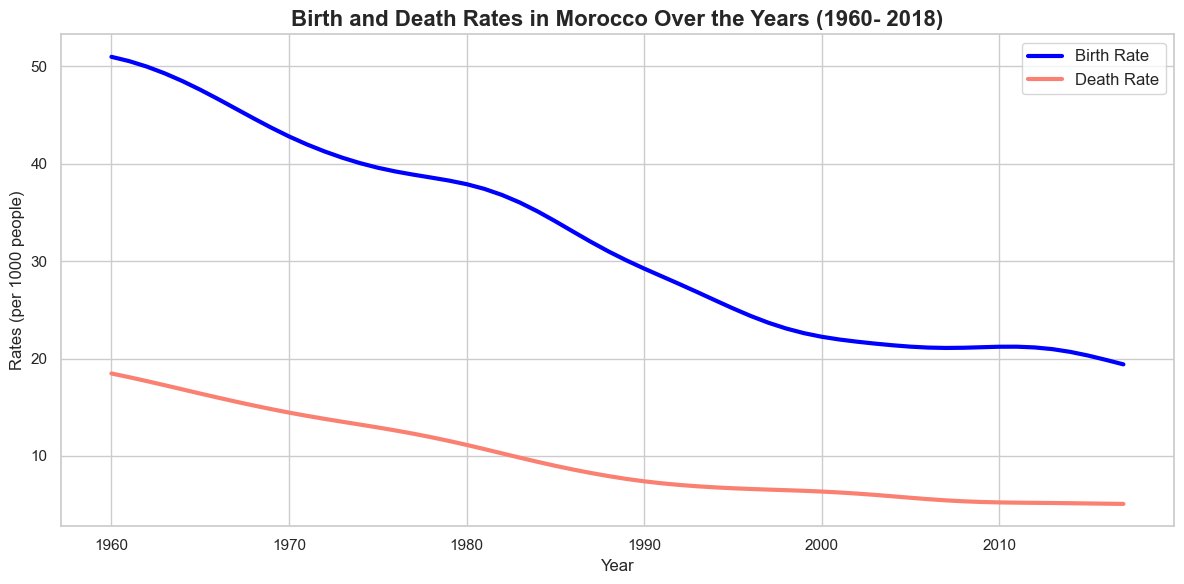

In [39]:
plt.figure(figsize=(12, 6))

birth_filter.plot(kind='line',linewidth=3, color=['blue', 'salmon'], ax=plt.gca())
                   
plt.title('Birth and Death Rates in Morocco Over the Years (1960- 2018)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rates (per 1000 people)', fontsize=12)

plt.grid(True)

plt.legend(['Birth Rate', 'Death Rate'], fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()


#### Internet users analysis

In [40]:
bank_df.groupby('Region')['Internet users (%)'].mean().sort_values(ascending= False)

Region
North America                 54.159466
Europe & Central Asia         38.398265
Middle East & North Africa    24.083578
East Asia & Pacific           23.554646
Latin America & Caribbean     22.692850
South Asia                     7.286367
Sub-Saharan Africa             6.157572
Name: Internet users (%), dtype: float64

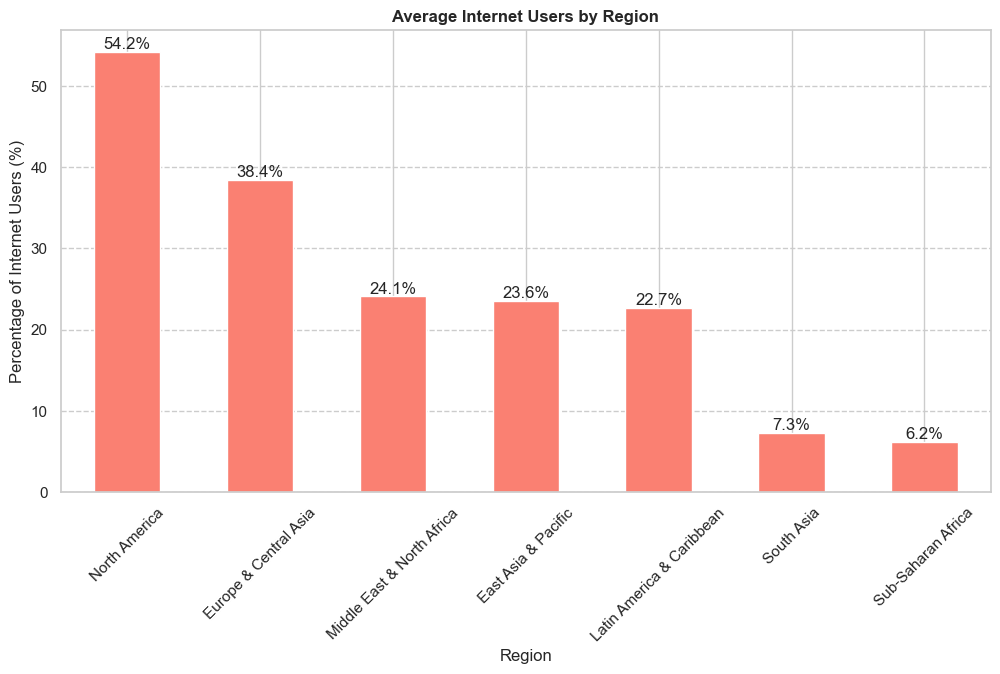

In [41]:
#Group by 'Region' and calculate the mean of 'Internet users (%)'
internet_users_by_region = bank_df.groupby('Region')['Internet users (%)'].mean()
internet_users_by_region = internet_users_by_region.sort_values(ascending=False)

plt.figure(figsize=(12, 6))  
ax = internet_users_by_region.plot.bar(color='salmon')  
plt.title('Average Internet Users by Region', fontweight='bold')  
plt.xlabel('Region')  
plt.ylabel('Percentage of Internet Users (%)') 
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--')  

# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show() 

#### the heigher percentage of the users using Internet are in the North America & Europe in addition Central Asia.

In [42]:
Internet_users= MAR_filter['Internet users (%)'].dropna()
Internet_users

7493    64.803900
7494    61.762200
7495    58.271200
7496    57.080000
7497    56.800000
7498    56.000000
7499    55.416100
7500    46.107500
7501    52.000000
7502    41.300000
7503    33.100000
7504    21.500000
7505    19.771200
7506    15.084400
7507    11.607900
7508     3.353370
7509     2.373250
7510     1.371440
7511     0.693791
7512     0.175595
7513     0.142301
7514     0.021635
7515     0.005675
7516     0.003710
7521     0.000000
Name: Internet users (%), dtype: float64

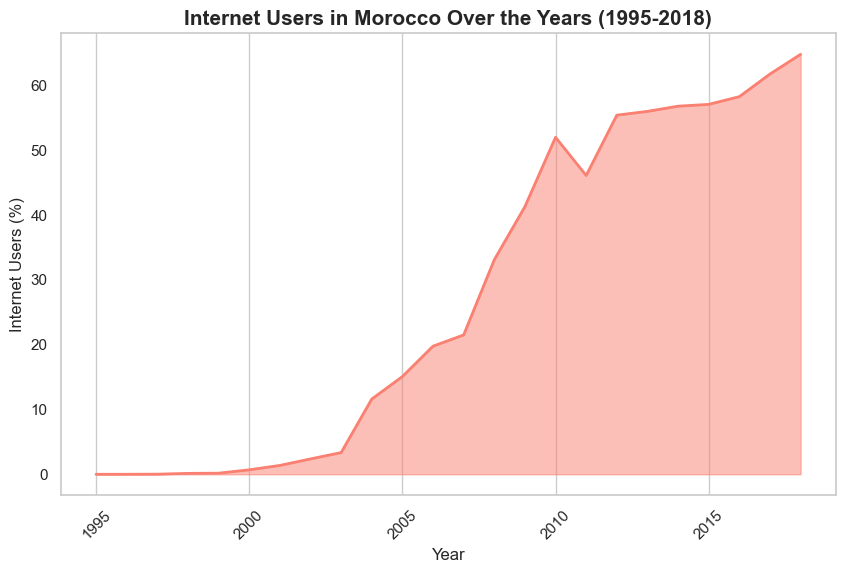

In [43]:
Internet_users = MAR_filter[['Year', 'Internet users (%)']].dropna()
Internet_users = Internet_users[Internet_users['Internet users (%)'] > 0]

plt.figure(figsize=(10, 6))


plt.fill_between(Internet_users['Year'], Internet_users['Internet users (%)'], 
                 color='salmon', alpha=0.5)

plt.plot(Internet_users['Year'], Internet_users['Internet users (%)'],
         color='salmon', linewidth=2)

plt.title('Internet Users in Morocco Over the Years (1995-2018)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Internet Users (%)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y')  
plt.show()

#### Unemployment rate analysis 

In [44]:
def classification_unemployment(rate):
    if pd.isna(rate):
        return 'unknown'
    elif rate>10:
        return 'High'
    elif 5 <= rate <= 10:
        return 'Medium'
    else:
        return 'Low'    
    

In [45]:
bank_df['Unmeployment category'] = bank_df['Unemployment (%)'].apply(classification_unemployment)

In [46]:
unemp_rate = bank_df[['Region', 'Unemployment (%)']].value_counts().sort_values(ascending=True)[:2]
unemp_rate

Region               Unemployment (%)
Sub-Saharan Africa   3.698               1
East Asia & Pacific  3.480               1
Name: count, dtype: int64

In [47]:
unemp_rate = bank_df[['Region', 'Unemployment (%)']].value_counts().sort_values(ascending=False)[:10]
unemp_rate

Region                      Unemployment (%)
East Asia & Pacific         3.2                 9
                            4.6                 7
                            3.4                 6
                            3.7                 6
                            3.6                 6
Europe & Central Asia       13.8                5
East Asia & Pacific         3.3                 5
Europe & Central Asia       1.9                 5
Middle East & North Africa  0.7                 5
East Asia & Pacific         4.5                 5
Name: count, dtype: int64

In [48]:
bank_df['Unemployment (%)'].describe().round(2)

count    5208.00
mean        8.30
std         6.29
min         0.14
25%         3.69
50%         6.78
75%        11.21
max        37.94
Name: Unemployment (%), dtype: float64

In [49]:
bank_df.groupby('Region')['Unemployment (%)'].mean().round(2).sort_values(ascending= False)

Region
Europe & Central Asia         9.97
Middle East & North Africa    9.60
Sub-Saharan Africa            8.80
Latin America & Caribbean     8.65
North America                 6.90
East Asia & Pacific           4.73
South Asia                    3.11
Name: Unemployment (%), dtype: float64

In [50]:
bank_df[['Region', 'Unemployment (%)']].min()

Region              East Asia & Pacific
Unemployment (%)                   0.14
dtype: object

In [51]:
bank_df[['Region', 'Unemployment (%)']].max()

Region              Sub-Saharan Africa
Unemployment (%)                 37.94
dtype: object

In [52]:
MAR_filter.groupby('Year')['Unemployment (%)'].mean().sort_values(ascending=False)

Year
1996    13.977
1999    13.940
1998    13.759
1994    13.747
1997    13.728
1995    13.629
2000    13.580
1993    13.355
1991    12.889
1992    12.877
2001    12.460
2003    11.920
2002    11.590
2005    11.010
2004    10.830
2014     9.700
2006     9.670
2008     9.570
2007     9.560
2015     9.460
2016     9.300
2013     9.230
2010     9.090
2017     9.053
2018     9.040
2012     8.990
2009     8.960
2011     8.910
1960       NaN
1961       NaN
1962       NaN
1963       NaN
1964       NaN
1965       NaN
1966       NaN
1967       NaN
1968       NaN
1969       NaN
1970       NaN
1971       NaN
1972       NaN
1973       NaN
1974       NaN
1975       NaN
1976       NaN
1977       NaN
1978       NaN
1979       NaN
1980       NaN
1981       NaN
1982       NaN
1983       NaN
1984       NaN
1985       NaN
1986       NaN
1987       NaN
1988       NaN
1989       NaN
1990       NaN
Name: Unemployment (%), dtype: float64

In [53]:
unemploy_rate_Mar = MAR_filter[['Year', 'Unemployment (%)']].dropna()
unemploy_rate_Mar

,Year,Unemployment (%)
7493,2018,9.040
7494,2017,9.053
7495,2016,9.300
7496,2015,9.460
7497,2014,9.700
7498,2013,9.230
7499,2012,8.990
7500,2011,8.910
7501,2010,9.090
7502,2009,8.960


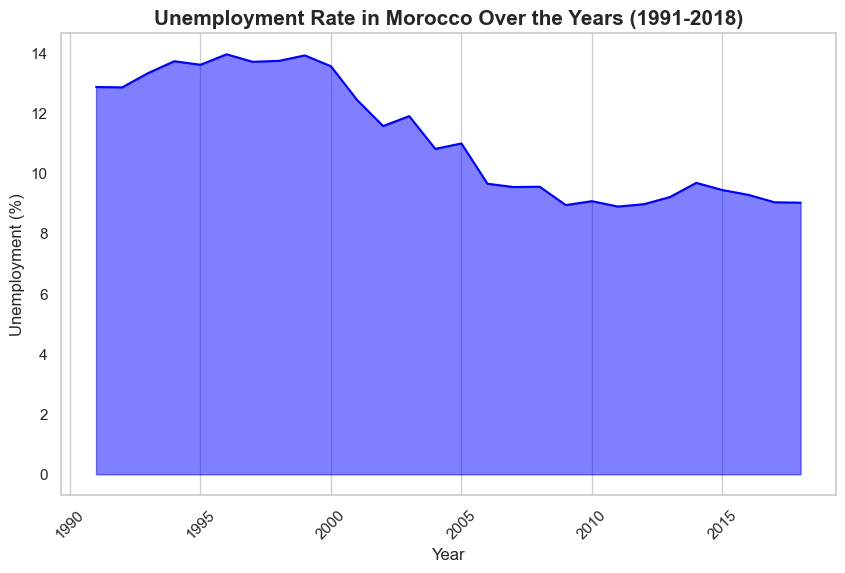

In [54]:
plt.figure(figsize=(10, 6))

plt.fill_between(unemploy_rate_Mar['Year'], unemploy_rate_Mar['Unemployment (%)'], 
                 color='blue', alpha=0.5)

plt.plot(unemploy_rate_Mar['Year'], unemploy_rate_Mar['Unemployment (%)'],
         color='blue')

plt.title('Unemployment Rate in Morocco Over the Years (1991-2018)', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Unemployment (%)')

plt.xticks(rotation=45)
plt.grid(axis='y')  
plt.show()

In [55]:
df_cat= bank_df[['Code','Region','Income Group','GDP_classification','Unmeployment category']]
df_cat

,Code,Region,Income Group,GDP_classification,Unmeployment category
0,AFG,South Asia,Low income,Low GDP,Low
1,AFG,South Asia,Low income,Low GDP,Low
2,AFG,South Asia,Low income,Low GDP,Low
3,AFG,South Asia,Low income,Low GDP,Low
4,AFG,South Asia,Low income,Low GDP,Low
...,...,...,...,...,...
12444,ZWE,Sub-Saharan Africa,Low income,Low GDP,unknown
12445,ZWE,Sub-Saharan Africa,Low income,Low GDP,unknown
12446,ZWE,Sub-Saharan Africa,Low income,Low GDP,unknown
12447,ZWE,Sub-Saharan Africa,Low income,Low GDP,unknown


In [56]:
df_num= bank_df[['Birth rate (Per 1000)','Death rate (per 1000)','Electric power consumption (kWh)','GDP ($)',
                 'GDP per capita (USD)','Internet users (%)','Infant mortality rate (Per 1000)',
                 'Life expectancy (years)','Population density (per sq. km)','Unemployment (%)']]
df_num

,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%)
0,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735
...,...,...,...,...,...,...,...,...,...,...
12444,47.770,13.083,NaN,1.217138e+09,281.558,NaN,83.2,54.849,11.1745,NaN
12445,47.876,13.419,NaN,1.159512e+09,277.480,NaN,85.7,54.403,10.8019,NaN
12446,47.950,13.762,NaN,1.117602e+09,276.689,NaN,88.1,53.946,10.4413,NaN
12447,47.988,14.104,NaN,1.096647e+09,280.829,NaN,90.5,53.483,10.0944,NaN


### NUM_DATA

In [57]:
imputer = SimpleImputer(strategy='mean')

In [58]:
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
df_num

,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%)
0,28.643276,10.588539,3175.294686,1.936300e+10,520.897,23.334471,47.9,64.044692,56.93780,1.542000
1,33.211000,6.575000,3175.294686,2.019180e+10,556.302,13.500000,49.5,64.130000,55.59600,1.559000
2,33.981000,6.742000,3175.294686,1.936260e+10,547.228,11.200000,51.2,63.763000,54.19710,1.634000
3,34.809000,6.929000,3175.294686,1.990710e+10,578.466,8.260000,53.1,63.377000,52.71210,1.679000
4,35.706000,7.141000,3175.294686,2.048490e+10,613.856,7.000000,55.1,62.966000,51.11480,1.735000
...,...,...,...,...,...,...,...,...,...,...
12444,47.770000,13.083000,3175.294686,1.217138e+09,281.558,23.334471,83.2,54.849000,11.17450,8.295079
12445,47.876000,13.419000,3175.294686,1.159512e+09,277.480,23.334471,85.7,54.403000,10.80190,8.295079
12446,47.950000,13.762000,3175.294686,1.117602e+09,276.689,23.334471,88.1,53.946000,10.44130,8.295079
12447,47.988000,14.104000,3175.294686,1.096647e+09,280.829,23.334471,90.5,53.483000,10.09440,8.295079


In [59]:
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num

,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%)
0,2.822319e-16,0.000000,1.485393e-16,-0.191350,-0.543652,0.000000,-0.092095,0.000000,-0.168526,-1.659878
1,3.628655e-01,-0.763543,1.485393e-16,-0.190297,-0.541156,-0.544541,-0.053363,0.007836,-0.169389,-1.655699
2,4.240352e-01,-0.731772,1.485393e-16,-0.191350,-0.541796,-0.671893,-0.012211,-0.025874,-0.170289,-1.637265
3,4.898125e-01,-0.696197,1.485393e-16,-0.190659,-0.539594,-0.834683,0.033783,-0.061328,-0.171245,-1.626204
4,5.610713e-01,-0.655866,1.485393e-16,-0.189925,-0.537098,-0.904450,0.082197,-0.099079,-0.172272,-1.612439
...,...,...,...,...,...,...,...,...,...,...
12444,1.519450e+00,0.474551,1.485393e-16,-0.214388,-0.560527,0.000000,0.762417,-0.844631,-0.197971,0.000000
12445,1.527871e+00,0.538472,1.485393e-16,-0.214462,-0.560814,0.000000,0.822935,-0.885596,-0.198210,0.000000
12446,1.533749e+00,0.603725,1.485393e-16,-0.214515,-0.560870,0.000000,0.881032,-0.927572,-0.198442,0.000000
12447,1.536768e+00,0.668787,1.485393e-16,-0.214541,-0.560578,0.000000,0.939130,-0.970099,-0.198665,0.000000


### CAT_DATA

In [60]:
one_hot = OneHotEncoder(drop='first')

df_cat = pd.DataFrame(one_hot.fit_transform(df_cat).todense(), columns=one_hot.get_feature_names_out())
df_cat

,Code_AFG,Code_AGO,Code_ALB,Code_AND,Code_ARE,Code_ARG,Code_ARM,Code_ASM,Code_ATG,Code_AUS,...,Income Group_High income: nonOECD,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income,GDP_classification_Low GDP,GDP_classification_Medium GDP,GDP_classification_Unknown,Unmeployment category_Low,Unmeployment category_Medium,Unmeployment category_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df = pd.concat([df_num , df_cat], axis=1)
df

,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%),...,Income Group_High income: nonOECD,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income,GDP_classification_Low GDP,GDP_classification_Medium GDP,GDP_classification_Unknown,Unmeployment category_Low,Unmeployment category_Medium,Unmeployment category_unknown
0,2.822319e-16,0.000000,1.485393e-16,-0.191350,-0.543652,0.000000,-0.092095,0.000000,-0.168526,-1.659878,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.628655e-01,-0.763543,1.485393e-16,-0.190297,-0.541156,-0.544541,-0.053363,0.007836,-0.169389,-1.655699,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4.240352e-01,-0.731772,1.485393e-16,-0.191350,-0.541796,-0.671893,-0.012211,-0.025874,-0.170289,-1.637265,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4.898125e-01,-0.696197,1.485393e-16,-0.190659,-0.539594,-0.834683,0.033783,-0.061328,-0.171245,-1.626204,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.610713e-01,-0.655866,1.485393e-16,-0.189925,-0.537098,-0.904450,0.082197,-0.099079,-0.172272,-1.612439,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,1.519450e+00,0.474551,1.485393e-16,-0.214388,-0.560527,0.000000,0.762417,-0.844631,-0.197971,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12445,1.527871e+00,0.538472,1.485393e-16,-0.214462,-0.560814,0.000000,0.822935,-0.885596,-0.198210,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12446,1.533749e+00,0.603725,1.485393e-16,-0.214515,-0.560870,0.000000,0.881032,-0.927572,-0.198442,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12447,1.536768e+00,0.668787,1.485393e-16,-0.214541,-0.560578,0.000000,0.939130,-0.970099,-0.198665,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [62]:
X = df.drop(['Income Group_High income: nonOECD','Income Group_Low income','Income Group_Lower middle income',
             'Income Group_Upper middle income'], axis=1)
X

,Birth rate (Per 1000),Death rate (per 1000),Electric power consumption (kWh),GDP ($),GDP per capita (USD),Internet users (%),Infant mortality rate (Per 1000),Life expectancy (years),Population density (per sq. km),Unemployment (%),...,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,GDP_classification_Low GDP,GDP_classification_Medium GDP,GDP_classification_Unknown,Unmeployment category_Low,Unmeployment category_Medium,Unmeployment category_unknown
0,2.822319e-16,0.000000,1.485393e-16,-0.191350,-0.543652,0.000000,-0.092095,0.000000,-0.168526,-1.659878,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.628655e-01,-0.763543,1.485393e-16,-0.190297,-0.541156,-0.544541,-0.053363,0.007836,-0.169389,-1.655699,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4.240352e-01,-0.731772,1.485393e-16,-0.191350,-0.541796,-0.671893,-0.012211,-0.025874,-0.170289,-1.637265,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4.898125e-01,-0.696197,1.485393e-16,-0.190659,-0.539594,-0.834683,0.033783,-0.061328,-0.171245,-1.626204,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5.610713e-01,-0.655866,1.485393e-16,-0.189925,-0.537098,-0.904450,0.082197,-0.099079,-0.172272,-1.612439,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,1.519450e+00,0.474551,1.485393e-16,-0.214388,-0.560527,0.000000,0.762417,-0.844631,-0.197971,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
12445,1.527871e+00,0.538472,1.485393e-16,-0.214462,-0.560814,0.000000,0.822935,-0.885596,-0.198210,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
12446,1.533749e+00,0.603725,1.485393e-16,-0.214515,-0.560870,0.000000,0.881032,-0.927572,-0.198442,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
12447,1.536768e+00,0.668787,1.485393e-16,-0.214541,-0.560578,0.000000,0.939130,-0.970099,-0.198665,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
y = df[['Income Group_High income: nonOECD','Income Group_Low income','Income Group_Lower middle income',
        'Income Group_Upper middle income']]
y

,Income Group_High income: nonOECD,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
12444,0.0,1.0,0.0,0.0
12445,0.0,1.0,0.0,0.0
12446,0.0,1.0,0.0,0.0
12447,0.0,1.0,0.0,0.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9336, 232)
(9336, 4)
(3113, 232)
(3113, 4)


In [65]:
#model = LogisticRegression()
model = RandomForestClassifier()

In [66]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred = model.predict(X_test)

In [68]:
print(f'accuracy_score of the model is : {accuracy_score(y_test, y_pred)}')

accuracy_score of the model is : 0.9942177963379377


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       733
           1       1.00      1.00      1.00       454
           2       1.00      1.00      1.00       690
           3       1.00      0.99      1.00       759

   micro avg       1.00      0.99      1.00      2636
   macro avg       1.00      0.99      1.00      2636
weighted avg       1.00      0.99      1.00      2636
 samples avg       0.84      0.84      0.84      2636



#### The Random Forest Classifier achieved excellent performance, with a precision and F1-score of 1.00 for most classes, indicating its high accuracy in classifying income groups based on global economic data. The model's overall recall of approximately 0.99 demonstrates its ability to effectively identify true instances, showcasing its reliability for economic analysis.